In [10]:
import pandas as pd
import numpy as np
from src.dictionaries import features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
df = pd.read_csv('data/full_dataset.csv')

In [11]:
X = df.loc[:,features].values
y_recovery = df.loc[:,['recovery']] * 1
y_delta = df.loc[:,['delta']]
X = StandardScaler().fit_transform(X)
pca = PCA(n_components = 20)
pca.fit(X)
pca.explained_variance_ratio_



array([0.07710599, 0.01767315, 0.01023223, 0.00857536, 0.00823508,
       0.00693163, 0.00625316, 0.00614813, 0.005686  , 0.00503595,
       0.00490453, 0.00461164, 0.00437548, 0.00413801, 0.00403975,
       0.00383611, 0.00358847, 0.00345195, 0.00341294, 0.00337184])

In [24]:
X = df.loc[:,features].values
y_recovery = (df.loc[:,['recovery']].values * 1)
y_delta = df.loc[:,['delta']].values
X_train, X_test, y_train, y_test = train_test_split(X, y_recovery, test_size=.2, random_state=7)
# y_train.reshape(len(y_train),)
# y_test.reshape(len(y_test),)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.85)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# logisticRegr = LogisticRegression(solver = 'saga')
# logisticRegr.fit(X_train, y_train.values.ravel())
# logisticRegr.score(X_test, y_test)

663


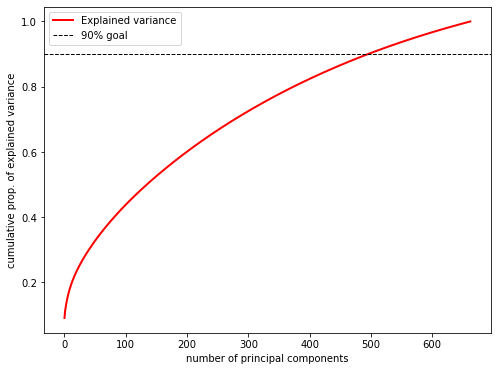

In [25]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();
print(len(pca.explained_variance_))